<a href="https://colab.research.google.com/github/MWFK/NLP-from-Zero-to-Hero/blob/main/1_LSTM_on_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Licensed under the Apache License, Version 2.0 (the "License");

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0
2.4.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZQYVWT/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZQYVWT/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZQYVWT/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 71s 158ms/step - loss: 0.5930 - accuracy: 0.6610 - val_loss: 0.4642 - val_accuracy: 0.7911
Epoch 2/10
391/391 [==============================] - 61s 154ms/step - loss: 0.3962 - accuracy: 0.8367 - val_loss: 0.6988 - val_accuracy: 0.7510
Epoch 3/10
391/391 [==============================] - 61s 155ms/step - loss: 0.3532 - accuracy: 0.8623 - val_loss: 0.5243 - val_accuracy: 0.7444
Epoch 4/10
391/391 [==============================] - 61s 155ms/step - loss: 0.3411 - accuracy: 0.8616 - val_loss: 0.4453 - val_accuracy: 0.8349
Epoch 5/10
391/391 [==============================] - 61s 155ms/step - loss: 0.2562 - accuracy: 0.9042 - val_loss: 0.4421 - val_accuracy: 0.8240
Epoch 6/10
391/391 [==============================] - 61s 155ms/step - loss: 0.2078 - accuracy: 0.9245 - val_loss: 0.4802 - val_accuracy: 0.8423
Epoch 7/10
391/391 [==============================] - 61s 155ms/step - loss: 0.1829 - accuracy: 0.9340 - val_loss: 0.5029 - val_ac

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

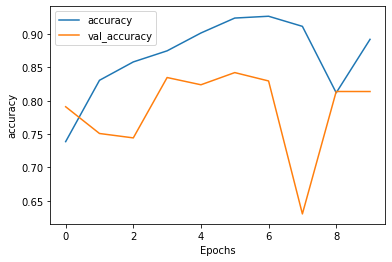

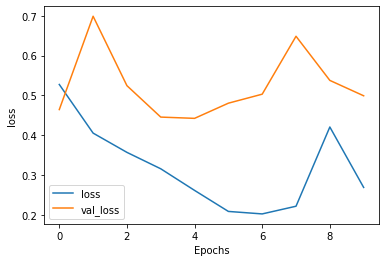

In [7]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Multiple Layer LSTM

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 63s 155ms/step - loss: 0.1658 - accuracy: 0.9408 - val_loss: 0.5081 - val_accuracy: 0.8238
Epoch 2/10
391/391 [==============================] - 61s 154ms/step - loss: 0.1053 - accuracy: 0.9643 - val_loss: 0.5884 - val_accuracy: 0.8086
Epoch 3/10
391/391 [==============================] - 61s 154ms/step - loss: 0.0825 - accuracy: 0.9739 - val_loss: 0.6229 - val_accuracy: 0.8283
Epoch 4/10
391/391 [==============================] - 62s 156ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.7283 - val_accuracy: 0.8330
Epoch 5/10
391/391 [==============================] - 61s 156ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.7661 - val_accuracy: 0.8374
Epoch 6/10
391/391 [==============================] - 61s 155ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.8476 - val_accuracy: 0.8149
Epoch 7/10
391/391 [==============================] - 61s 155ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.8262 - val_ac

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()